In [8]:
from dataset import SaliencyDataset
from scipy.ndimage import gaussian_filter as g
import numpy as np
import os 
import matplotlib.pyplot as plt

In [3]:

# Dataset files will be stored in ~/tmp/saliency.  
# Consider passing a config dict to change it accordingly 

CONFIG = {
	
		'data_path' : os.path.expanduser('~/tmp/saliency/'),
		'dataset_json': 'data/dataset.json',
		'auto_download' : True,
}
    
dataset = SaliencyDataset(config=CONFIG)

In [31]:
# get list of currenly converted datsets.
dataset.dataset_names()

['TORONTO',
 'CAT2000',
 'CROWD',
 'SALICON',
 'LOWRES',
 'KTH',
 'OSIE',
 'MIT1003',
 'PASCAL']

In [4]:
# load one from the list
dataset.load('OSIE')



In [33]:
# returns the list data available for the loaded dataset. 
#in some cases, the heatmaps has not been published by the author
# yet if the sequence is available, you can manually make it. follow this tutorial for more information.

dataset.data_type

array(['heatmap', 'sequence', 'sequence_mouse_lab', 'sequence_mouse_amt'],
      dtype='<U18')

In [5]:
# from now on, 'get' function will be your friend.
# It can retrieve and return scanpaths. use one of the keys from data_type

sequence = dataset.get('sequence') # return a np array. (N,O,F,D).
sequence.shape

(700, 15)

In [13]:
# Or only the path to heatmaps 

heatmap_path = dataset.get('heatmap_path') # will return a list of paths
heatmap_path.shape

(700,)

In [39]:
# Or it can read and return stimuli in numpy format

stimuli = dataset.get('stimuli', index=range(10)) # will return np array (N, W, H, 3)
stimuli.shape

(10, 600, 800, 3)

In [41]:
# Consider passing a list of index if you need a portion of dataset.


sample = dataset.get('stimuli_path', index=[0])
samples = dataset.get('stimuli_path', index=range(10))

In [8]:


# Some metrics like AUC need fixation maps instead of heatmaps (N, W, H)
fixations = dataset.get('fixation', index=range(10))

In [43]:
## Processing & filtering scanpaths.

## Eye-tracking data and specifically scanpath always have errors and out of boundary fixation points.

# Fixations in percntile format according to image resolution (N,O,F,D)
sequence = dataset.get('sequence', percentile=True) 

# Remove out of boundary fixations:
sequence = dataset.get('sequence', percentile=True, modify='remove') 

# or bring them back right inside boundary.
sequence = dataset.get('sequence', percentile=True, modify='fix') 

In [5]:


# fixation time maps
fixation_time_map = dataset.get('fixation_time', index=range(10))   # (N,W, H, 1)

row_max = fixation_time_map.max(axis=(1,2))[:, np.newaxis][:, np.newaxis]
fixation_time_map /= row_max


/home/ramin/codes/saliency/dataset.py:264: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(tmp, axis=0)


In [7]:
# duration weighted fixation map.

fixation_dw = dataset.get('fixation_dw', index=range(10))

# normalizing back to 0-1
row_max = fixation_time_map.max(axis=(1,2))[:, np.newaxis][:, np.newaxis]
fixation_dw /= row_max

/home/ramin/codes/saliency/dataset.py:278: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(tmp, axis=0)


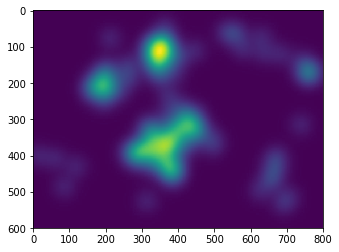

In [15]:
# heatmap provided by the author
ht = plt.imread(heatmap_path[0])
plt.imshow(ht)



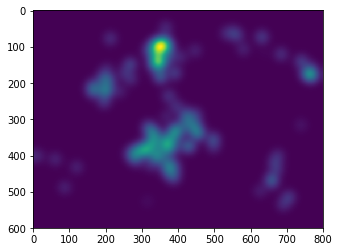

In [16]:
# duration weighed heatmap.
sample = fixation_dw[0]
sample = g(sample, sigma=15)

plt.imshow(sample)